# Bayesian Linear Regression Implementation

# Imports

In [3]:
import os
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('default')

In [4]:
class BayesianLinearRegression:

    def __init__(self,  m_0, S_0, noise_variance):       
        self.m_0 = m_0.reshape(-1, 1)
        self.S_0 = S_0
        self.noise_variance = noise_variance

    def set_posteriori_params(self, X, y):
        central_term = np.linalg.pinv(
            self.S_0 @ X.T @ X + self.noise_variance * np.identity(self.S_0.shape[0])
        ) @ self.S_0 @ X.T

        self.mu_posteriori = self.m_0 + central_term @ (y - X @ self.m_0)
        self.sigma_posteriori = self.S_0 - central_term @ X @ self.S_0

    def predict(self, X):
        mu = X @ self.mu_posteriori
        variance = X @ self.sigma_posteriori @ X.T + self.noise_variance

        return mu.reshape(-1, 1), np.diag(variance).reshape(-1, 1)

# Bayesian Linear Regression

In [5]:
# READING DATA
data = np.genfromtxt('../data/linear_regression_data.csv', delimiter=',')
print('Shape:', data.shape)
data[:5,:]

Shape: (10, 2)


array([[ 0.39293837,  0.08635962],
       [-0.42772133, -0.64387173],
       [-0.54629709, -0.67498147],
       [ 0.10262954, -0.26289158],
       [ 0.43893794,  0.14317741]])

In [6]:
# SPLITING X AND Y AND APPENDING INTERCEPT IN THE FIRST COLUMN
X = data[:,:-1]
X = np.hstack([np.ones(shape=(X.shape[0], 1)), X])
y = data[:,[-1]]

In [7]:
# SETTING PRIORI PARAMETERS AND GETTING POSTERIORI PARAMETERS
m_0 = np.array([[1, 0]])
S_0 = np.array([[1, 0], [0, 1]])
noise_variance = 0.1

blr = BayesianLinearRegression(m_0, S_0, noise_variance)
blr.set_posteriori_params(X, y)

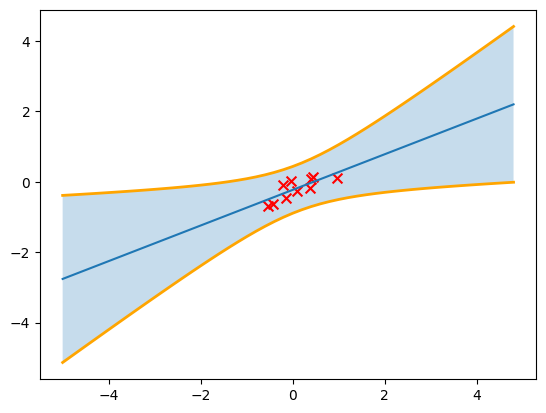

In [8]:
# GETTING A RANGE OF VALUES TO PLOT THE REGRESSION LINE AND THE STANDARD DEVIATION CURVES
X_temp = np.arange(-5, 5, 0.2).reshape(-1, 1)
X_temp = np.hstack([np.ones(shape=(X_temp.shape[0], 1)), X_temp])

# PREDICTING THE DISTRIBUTIONS
mu, variance = blr.predict(X_temp)

# PLOTTING RESULTS
plt.scatter(X[:, 1], y, marker='x', c='r', s=50)
plt.plot(X_temp[:, 1], mu)

y1 = (mu + 2 * np.sqrt(variance)).ravel()
y2 = (mu - 2 * np.sqrt(variance)).ravel()

plt.fill_between(X_temp[:, 1], y1=y1, y2=y2, alpha=0.25, zorder=-1)
plt.plot(X_temp[:, 1], y1, c='orange', linewidth=2)
plt.plot(X_temp[:, 1], y2, c='orange', linewidth=2)
